# 1. Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2. Data Pre-Processing and Visualization

## 2.1. Reading Dataset

In [4]:
cell_df = pd.read_csv('KDDTest+.txt')

### 2.1.1. Data Frames (default: first 5 row)

In [5]:
cell_df.head

<bound method NDFrame.head of        0   tcp   private   REJ    0.1    0.2  0.3  0.4  0.5  0.6  ...  0.04.1  \
0      0   tcp   private   REJ      0      0    0    0    0    0  ...    0.00   
1      2   tcp  ftp_data    SF  12983      0    0    0    0    0  ...    0.61   
2      0  icmp     eco_i    SF     20      0    0    0    0    0  ...    1.00   
3      1   tcp    telnet  RSTO      0     15    0    0    0    0  ...    0.31   
4      0   tcp      http    SF    267  14515    0    0    0    0  ...    1.00   
...   ..   ...       ...   ...    ...    ...  ...  ...  ...  ...  ...     ...   
22538  0   tcp      smtp    SF    794    333    0    0    0    0  ...    0.72   
22539  0   tcp      http    SF    317    938    0    0    0    0  ...    1.00   
22540  0   tcp      http    SF  54540   8314    0    0    0    2  ...    1.00   
22541  0   udp  domain_u    SF     42     42    0    0    0    0  ...    0.99   
22542  0   tcp    sunrpc   REJ      0      0    0    0    0    0  ...    0.08  

### 2.1.2. Dimensionality of the DataFrame

In [6]:
cell_df.shape

(22543, 43)

### 2.1.3. Elements in DataFrame (row*column)

In [7]:
cell_df.size

969349

### 2.1.4. Non-NA/NULL Entries

In [8]:
cell_df.count()

0          22543
tcp        22543
private    22543
REJ        22543
0.1        22543
0.2        22543
0.3        22543
0.4        22543
0.5        22543
0.6        22543
0.7        22543
0.8        22543
0.9        22543
0.10       22543
0.11       22543
0.12       22543
0.13       22543
0.14       22543
0.15       22543
0.16       22543
0.17       22543
0.18       22543
229        22543
10         22543
0.00       22543
0.00.1     22543
1.00       22543
1.00.1     22543
0.04       22543
0.06       22543
0.00.2     22543
255        22543
10.1       22543
0.04.1     22543
0.06.1     22543
0.00.3     22543
0.00.4     22543
0.00.5     22543
0.00.6     22543
1.00.2     22543
1.00.3     22543
neptune    22543
21         22543
dtype: int64

## 2.2. Adjust Column

### 2.2.1. Adjusting column with parameters

In [ ]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count','srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

cell_df.columns = columns

: 

In [ ]:
cell_df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


### 2.2.2. Data Insight

In [11]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [12]:
cell_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,22543.0,218.868784,1407.207069,0.0,0.00,0.00,0.00,57715.0
src_bytes,22543.0,10395.911369,472796.912692,0.0,0.00,54.00,287.00,62825648.0
dst_bytes,22543.0,2056.110012,21219.763847,0.0,0.00,46.00,601.00,1345927.0
land,22543.0,0.000311,0.017619,0.0,0.00,0.00,0.00,1.0
wrong_fragment,22543.0,0.008428,0.142602,0.0,0.00,0.00,0.00,3.0
urgent,22543.0,0.000710,0.036474,0.0,0.00,0.00,0.00,3.0
hot,22543.0,0.105399,0.928448,0.0,0.00,0.00,0.00,101.0
num_failed_logins,22543.0,0.021648,0.150331,0.0,0.00,0.00,0.00,4.0
logged_in,22543.0,0.442222,0.496661,0.0,0.00,0.00,1.00,1.0
num_compromised,22543.0,0.119904,7.269758,0.0,0.00,0.00,0.00,796.0


## 2.3. Data Cleaning

### 2.3.1. Null Values

In [13]:
cell_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [14]:
#helper function for deeper analysis
def unique_values(cell_df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = cell_df[column_name].unique()
        value_counts = cell_df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [15]:
cat_features = cell_df.select_dtypes(include='object').columns
unique_values(cell_df, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['tcp' 'icmp' 'udp']

Value Counts:
protocol_type
tcp     18879
udp      2621
icmp     1043
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (64): ['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql_net' 'shell' 'hostnames' 'echo' 'daytime' 'pm_dump' 'IRC'
 'netstat' 'ctf' 'nntp' 'netbios_ssn' 'tim_i' 'supdup' 'bgp' 'nnsp' 'rje'
 'printer' 'efs' 'X11' 'ntp_u' 'klogin' 'tftp_u']

Value Counts:
service
http       7853
private    4773
telnet     1626
pop_3      1019
smtp        934
           ... 
printer      11
ntp_u        10
rje           8
tim_i       

Further analysis will be in EDA-VISAULAZTION part about these column's impacts on Attacks

In [16]:
cell_df.duplicated().sum()

np.int64(0)

NO DUPLICATED ROW

# 3. Data Analysis and Visualization

## 3.1. Outliers

In [30]:
cell_df.shape

(22543, 43)

<Figure size 2000x4000 with 0 Axes>

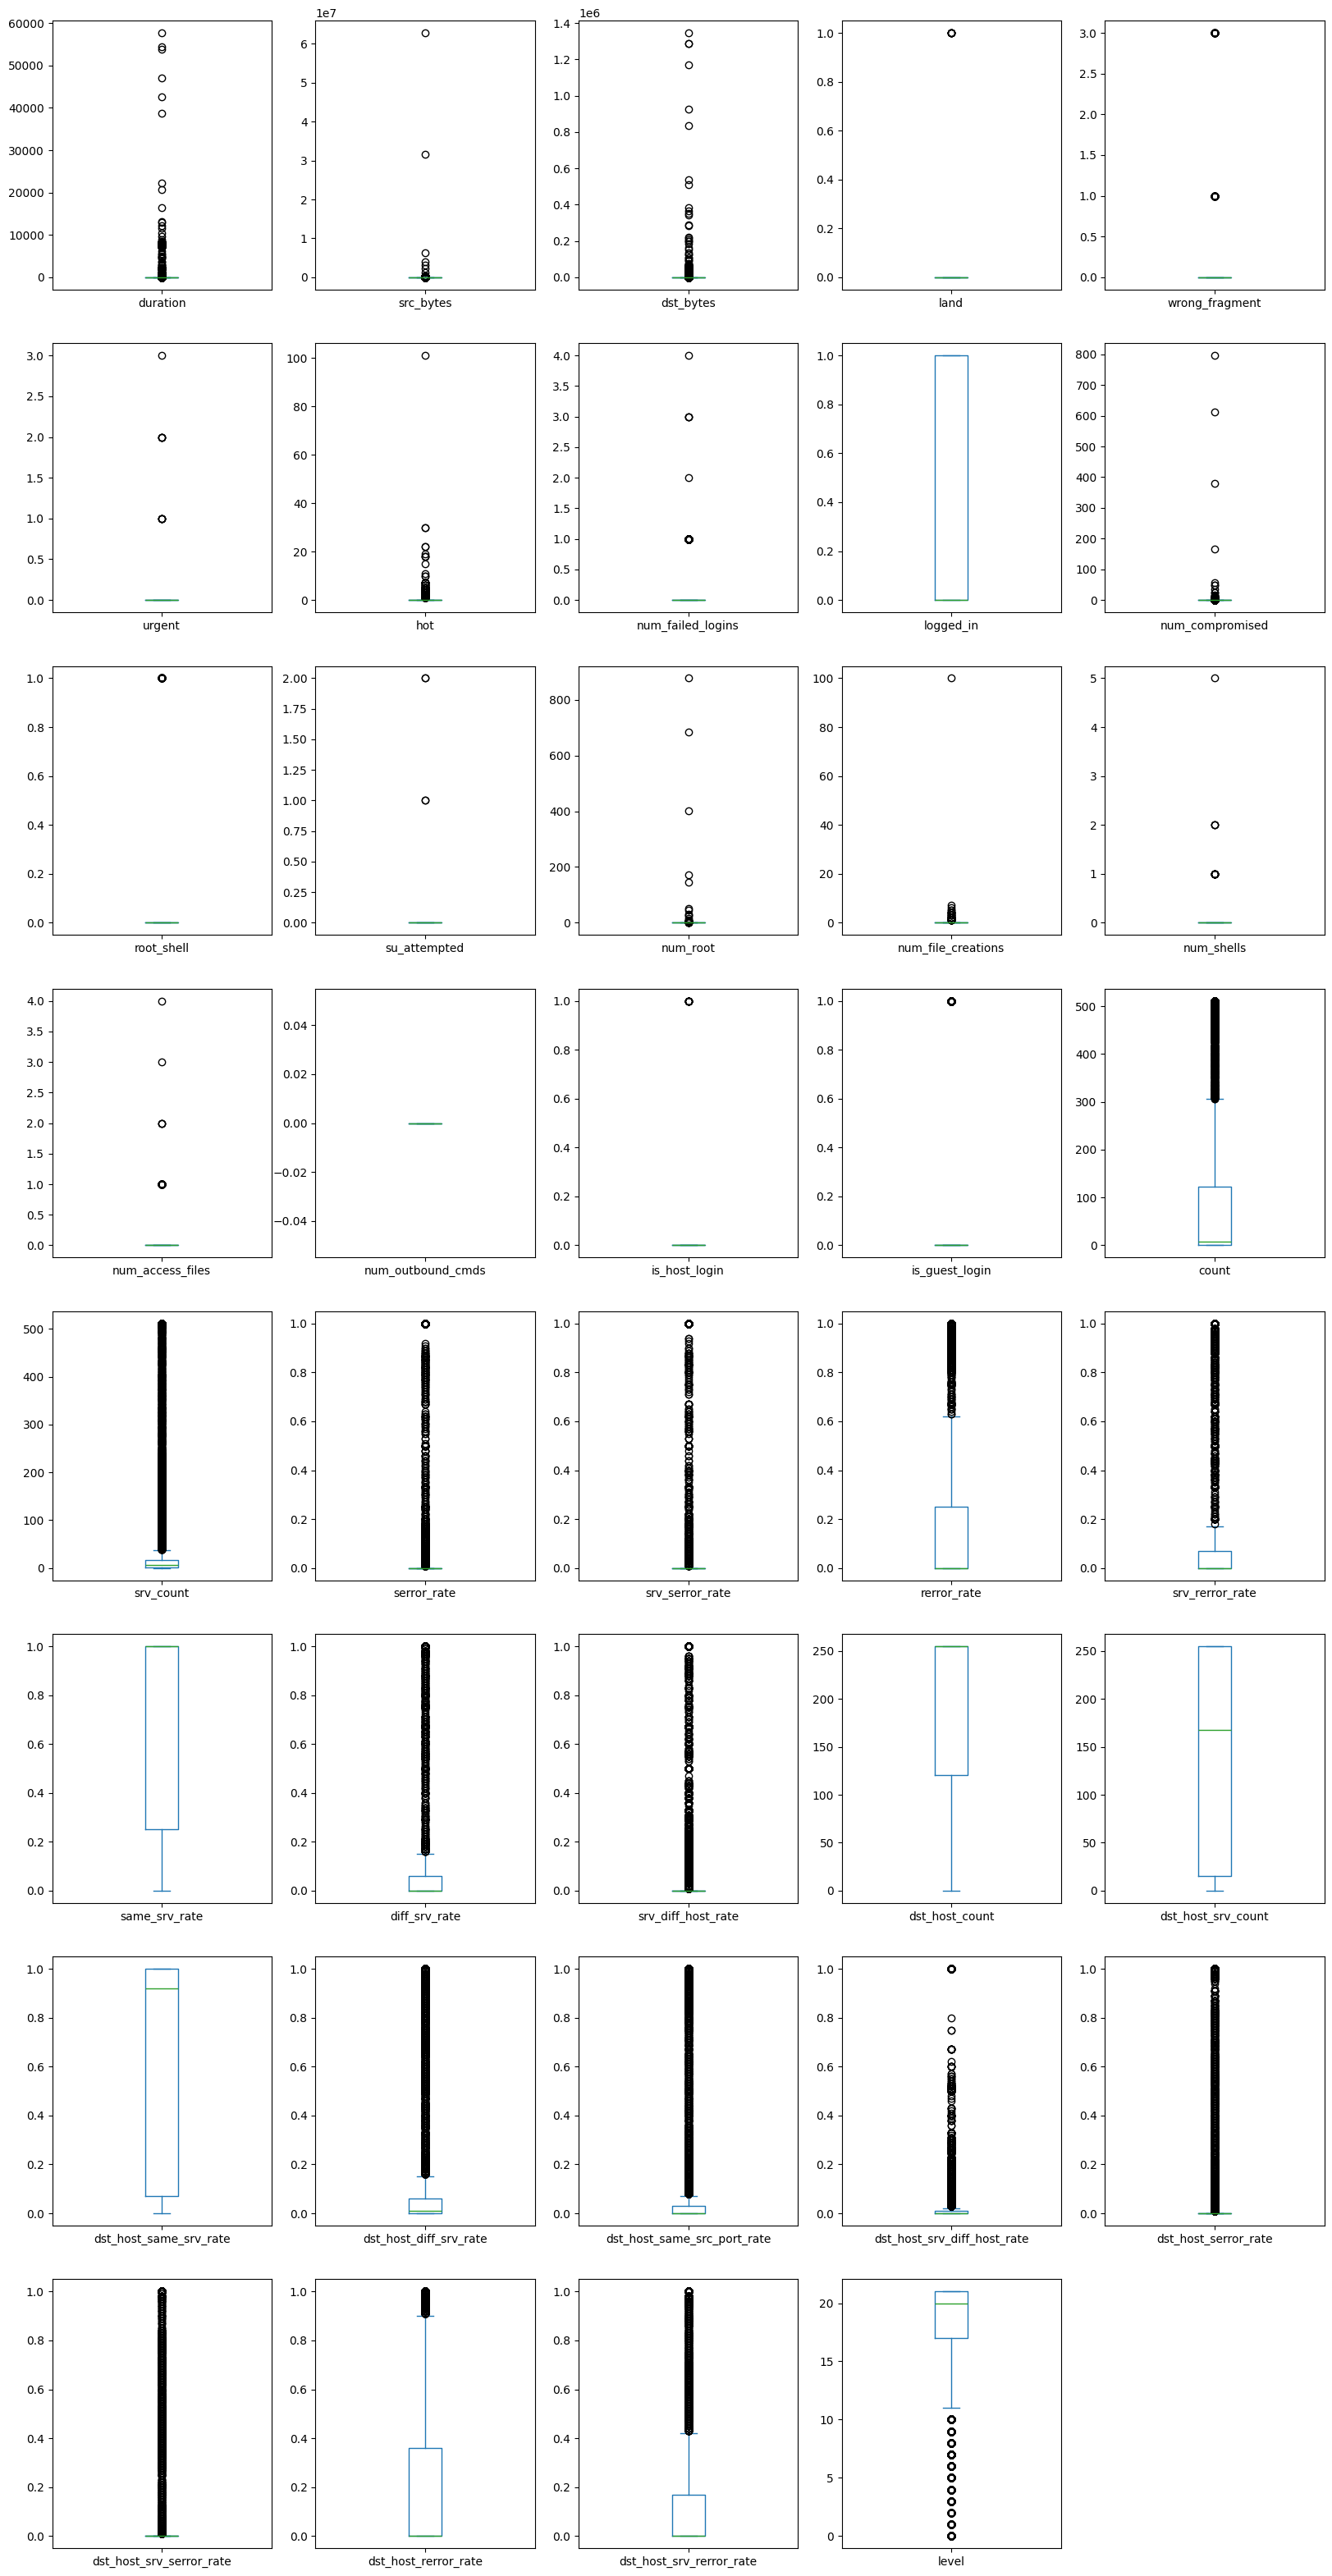

In [18]:
plt.figure(figsize=(20,40))
cell_df.plot(kind= "box", subplots = True, layout = (8,5), figsize = (20,40))
plt.show()

## 3.2. CLASSIFY ATTACK OR NOT

In [31]:
attack_n = []
for i in cell_df.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
cell_df['attack'] = attack_n 

In [32]:
cell_df['attack'].unique()

array(['attack'], dtype=object)

## 3.3. Exploratory Aata Analysis (EDA)

[Visualization]

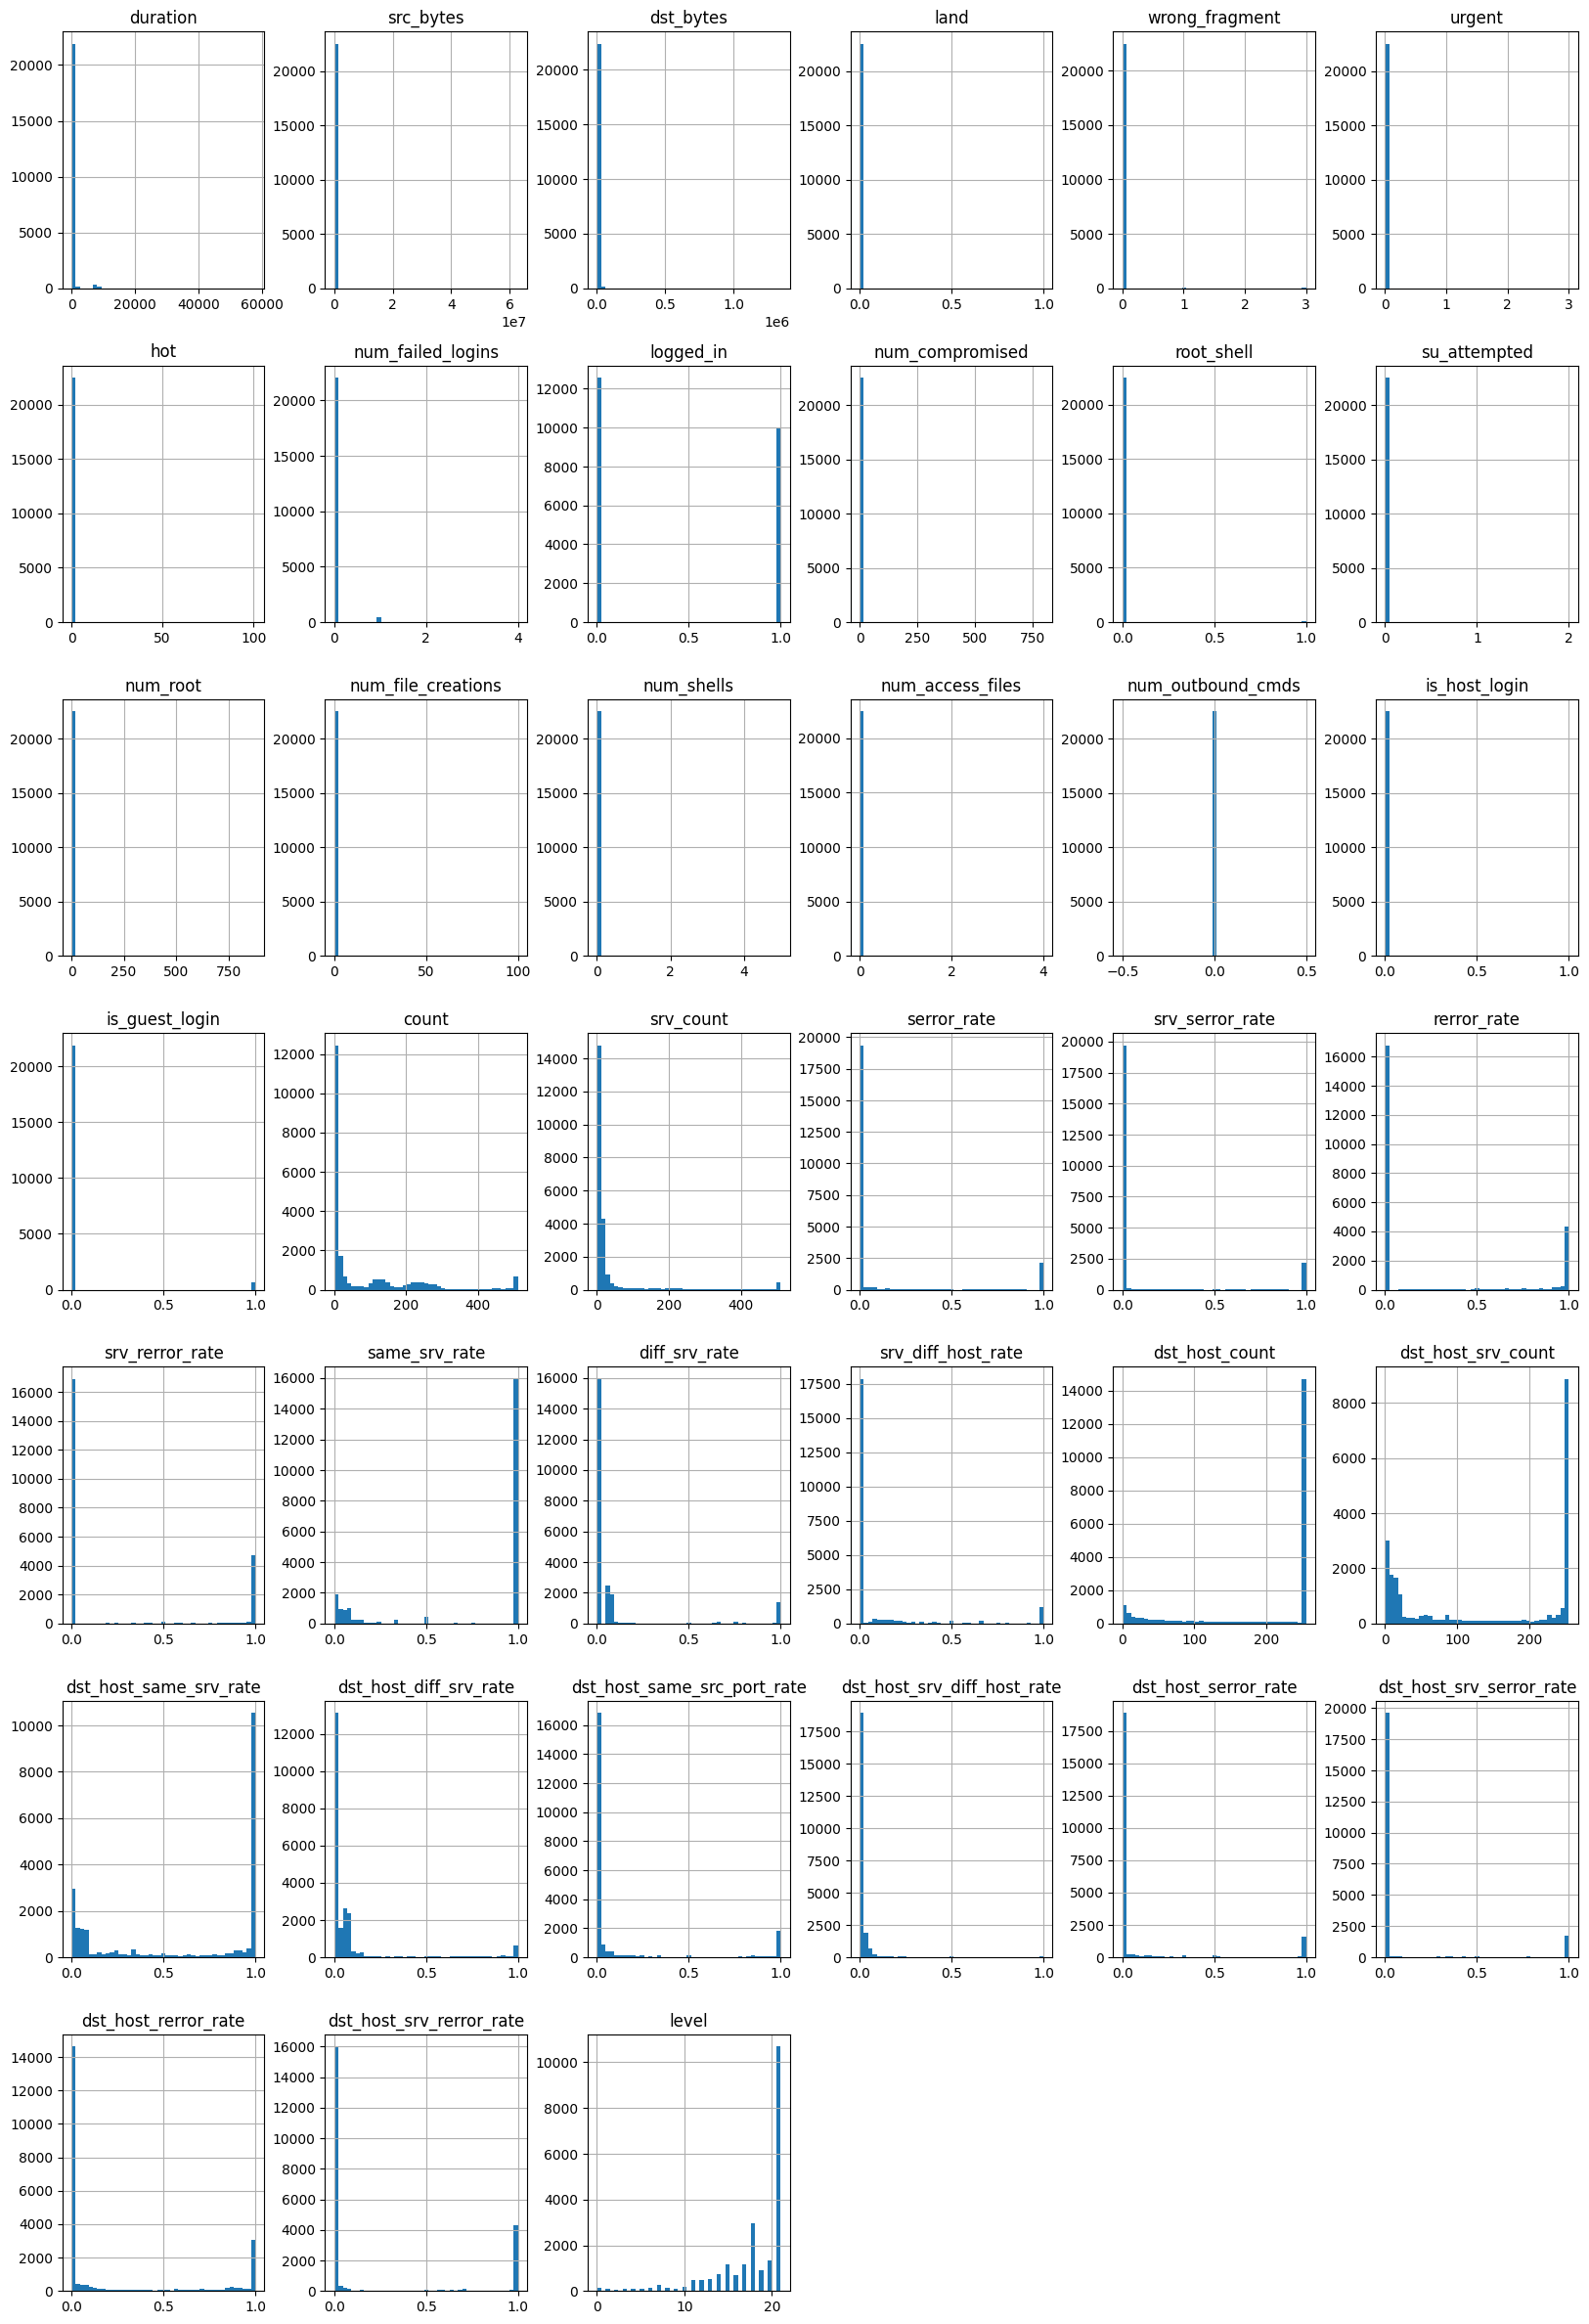

In [21]:
cell_df.hist(bins=43,figsize=(20,30));

## 3.4. Protocol Type

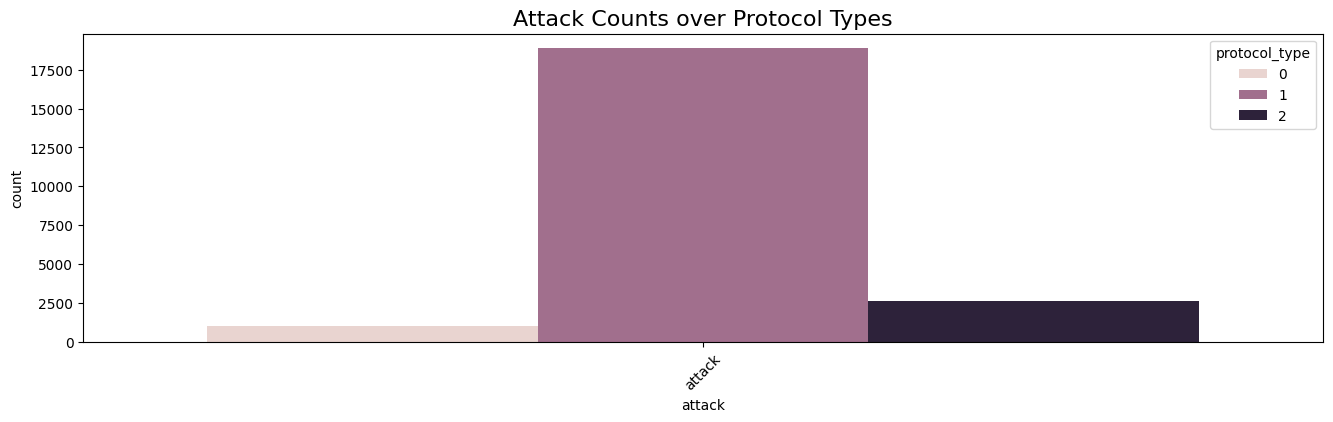

In [33]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=cell_df,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

In [34]:
cell_df["protocol_type"].value_counts(normalize=True)

protocol_type
1    0.837466
2    0.116267
0    0.046267
Name: proportion, dtype: float64

## 3.5. Service used general

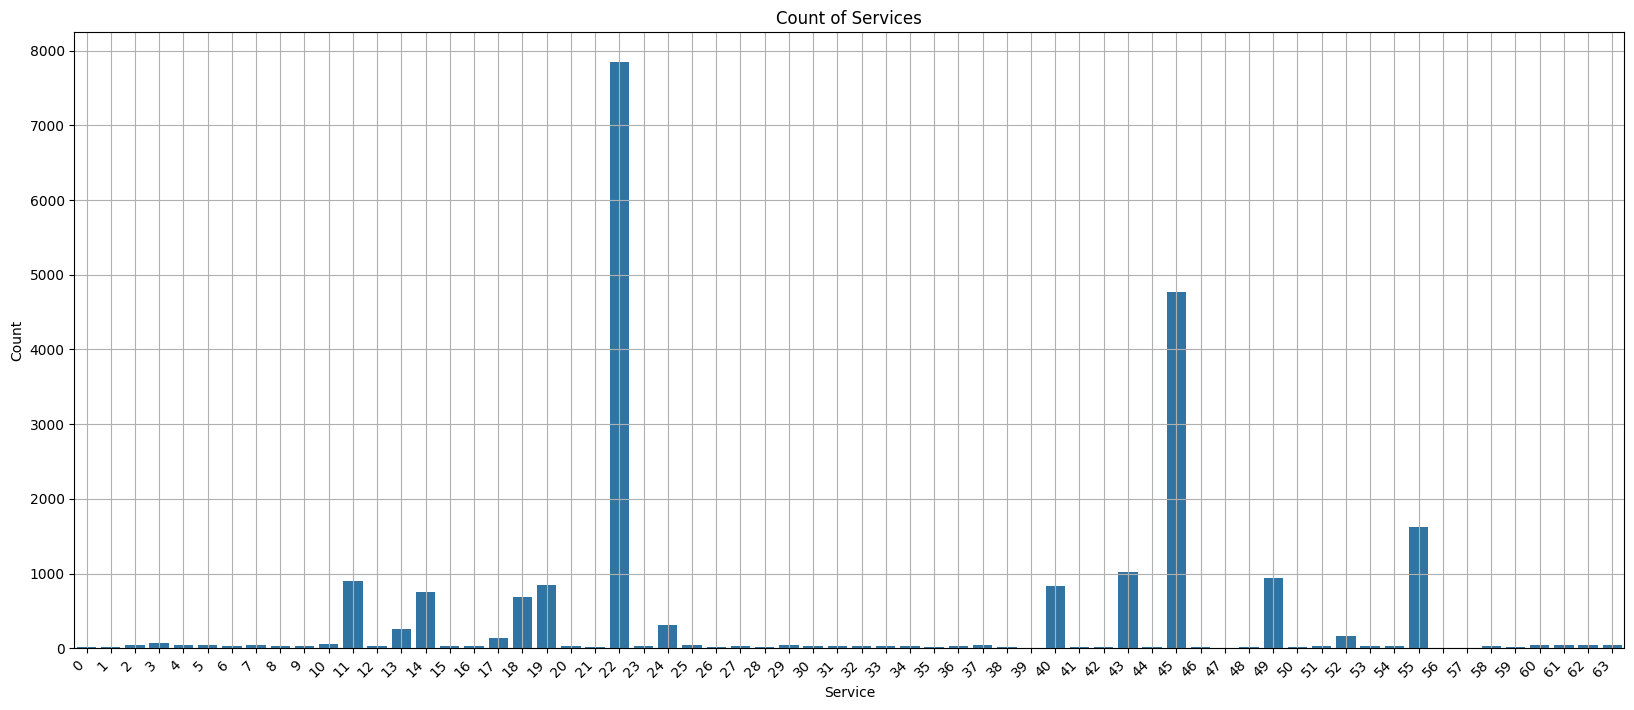

In [35]:
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=cell_df)

# Rotate the tick labels
plt.xticks(rotation=45, ha='right')

plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

## 3.6. Service used effect on attacks

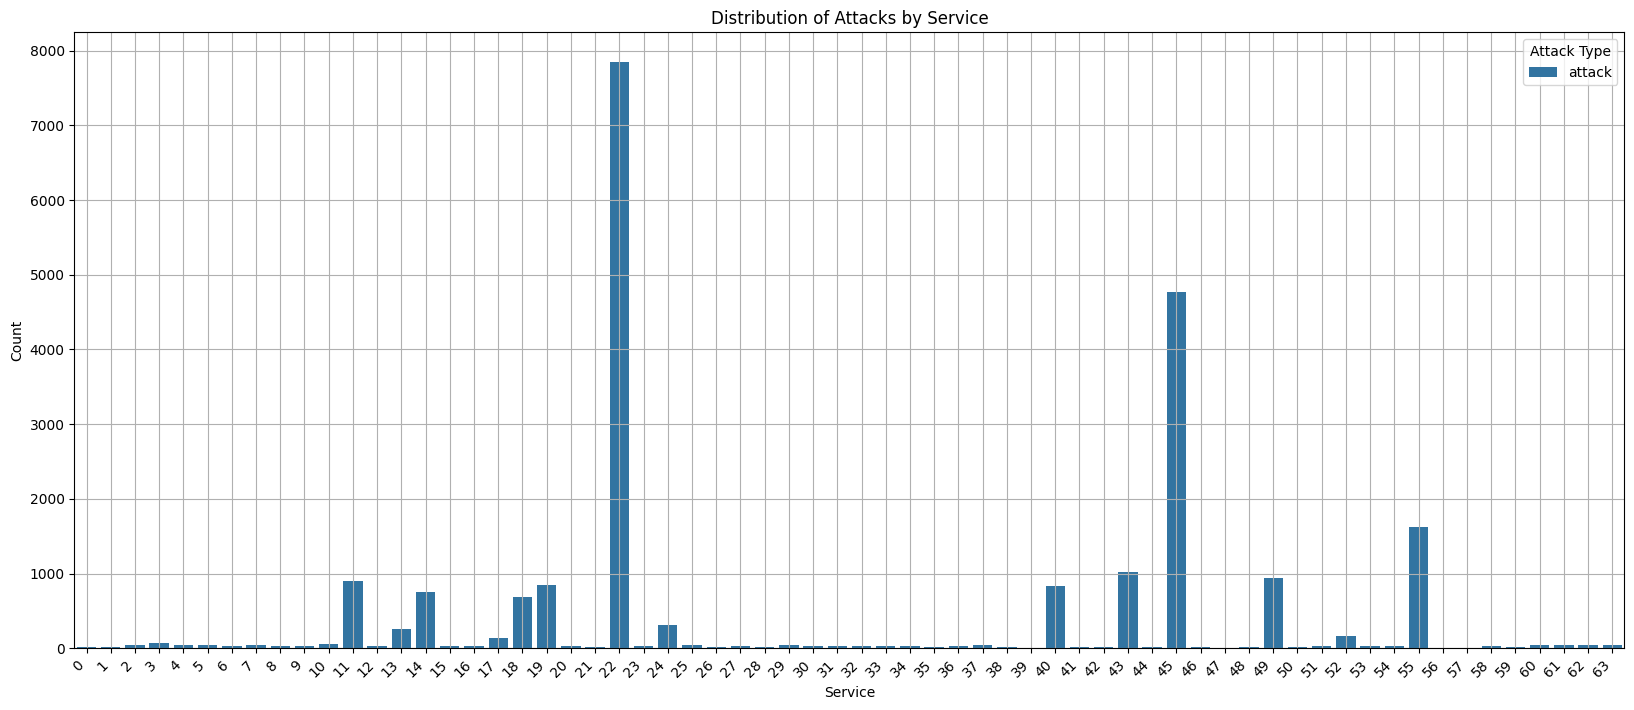

In [36]:
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='attack', data=cell_df)

# Rotate the tick labels
plt.xticks(rotation=45, ha='right')

plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

## 3.7. Kernel Density Estimate (KDE) Plot of Duration by Flag

/tmp/ipykernel_31188/299523418.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(


<Figure size 1200x800 with 0 Axes>

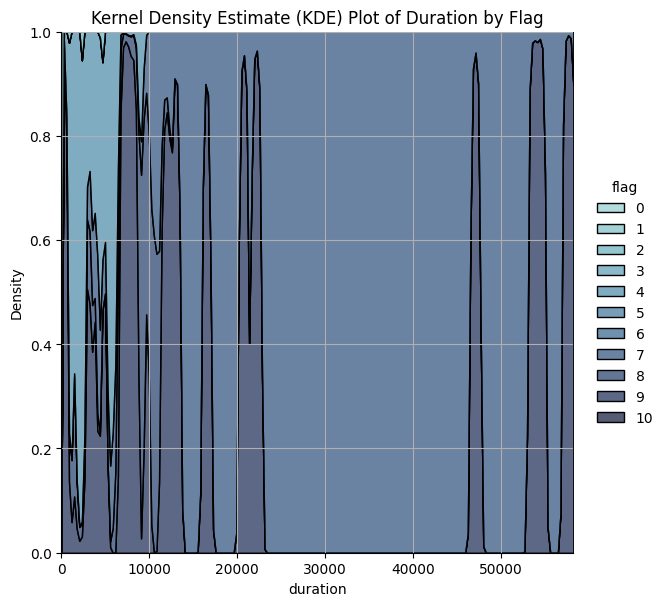

In [37]:
plt.figure(figsize=(12, 8))
sns.displot(
    data=cell_df,
    x="duration",
    hue="flag",
    kind="kde",
    height=6,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.title('Kernel Density Estimate (KDE) Plot of Duration by Flag')
plt.grid(True)
plt.show()

## 3.8. Distribution of Attack Types by Guest Login

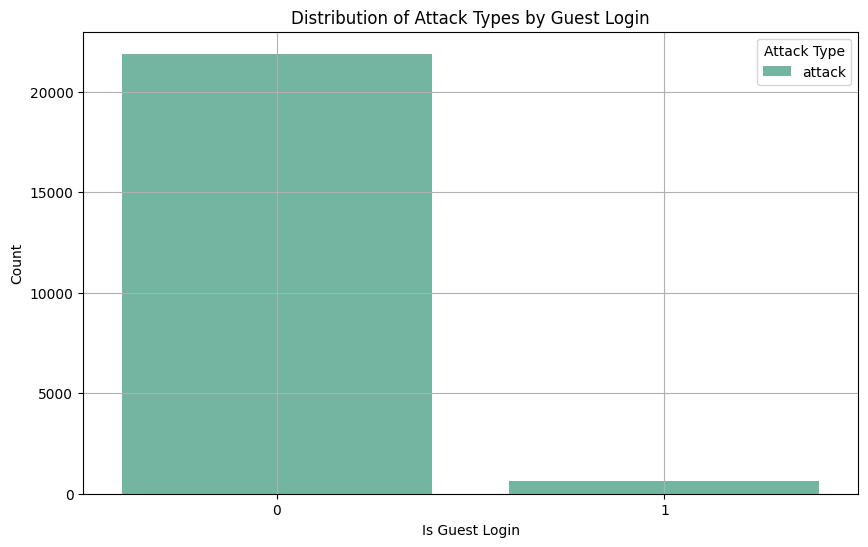

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='attack', data=cell_df, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

## 3.9. Encoding

In [39]:
data_obj = cell_df.select_dtypes(['object']).columns

In [44]:
cell_df["attack"].value_counts()

attack
attack    22543
Name: count, dtype: int64

In [45]:
data_obj

Index(['attack'], dtype='object')

In [46]:
protocol_type_le = LabelEncoder()
service_le = LabelEncoder()
flag_le = LabelEncoder()

In [48]:
cell_df['protocol_type'] = protocol_type_le.fit_transform(cell_df['protocol_type'])
cell_df['service'] = service_le.fit_transform(cell_df['service'])
cell_df['flag'] = flag_le.fit_transform(cell_df['flag'])
#convert categorical data into numerical data.

In [49]:
attack_n = []
for i in cell_df.attack :
  if i == 'normal':
    attack_n.append(0)
  else:
    attack_n.append(1)
cell_df['attack'] = attack_n 

In [50]:
cell_df['attack'].value_counts()

attack
1    22543
Name: count, dtype: int64

<Axes: >

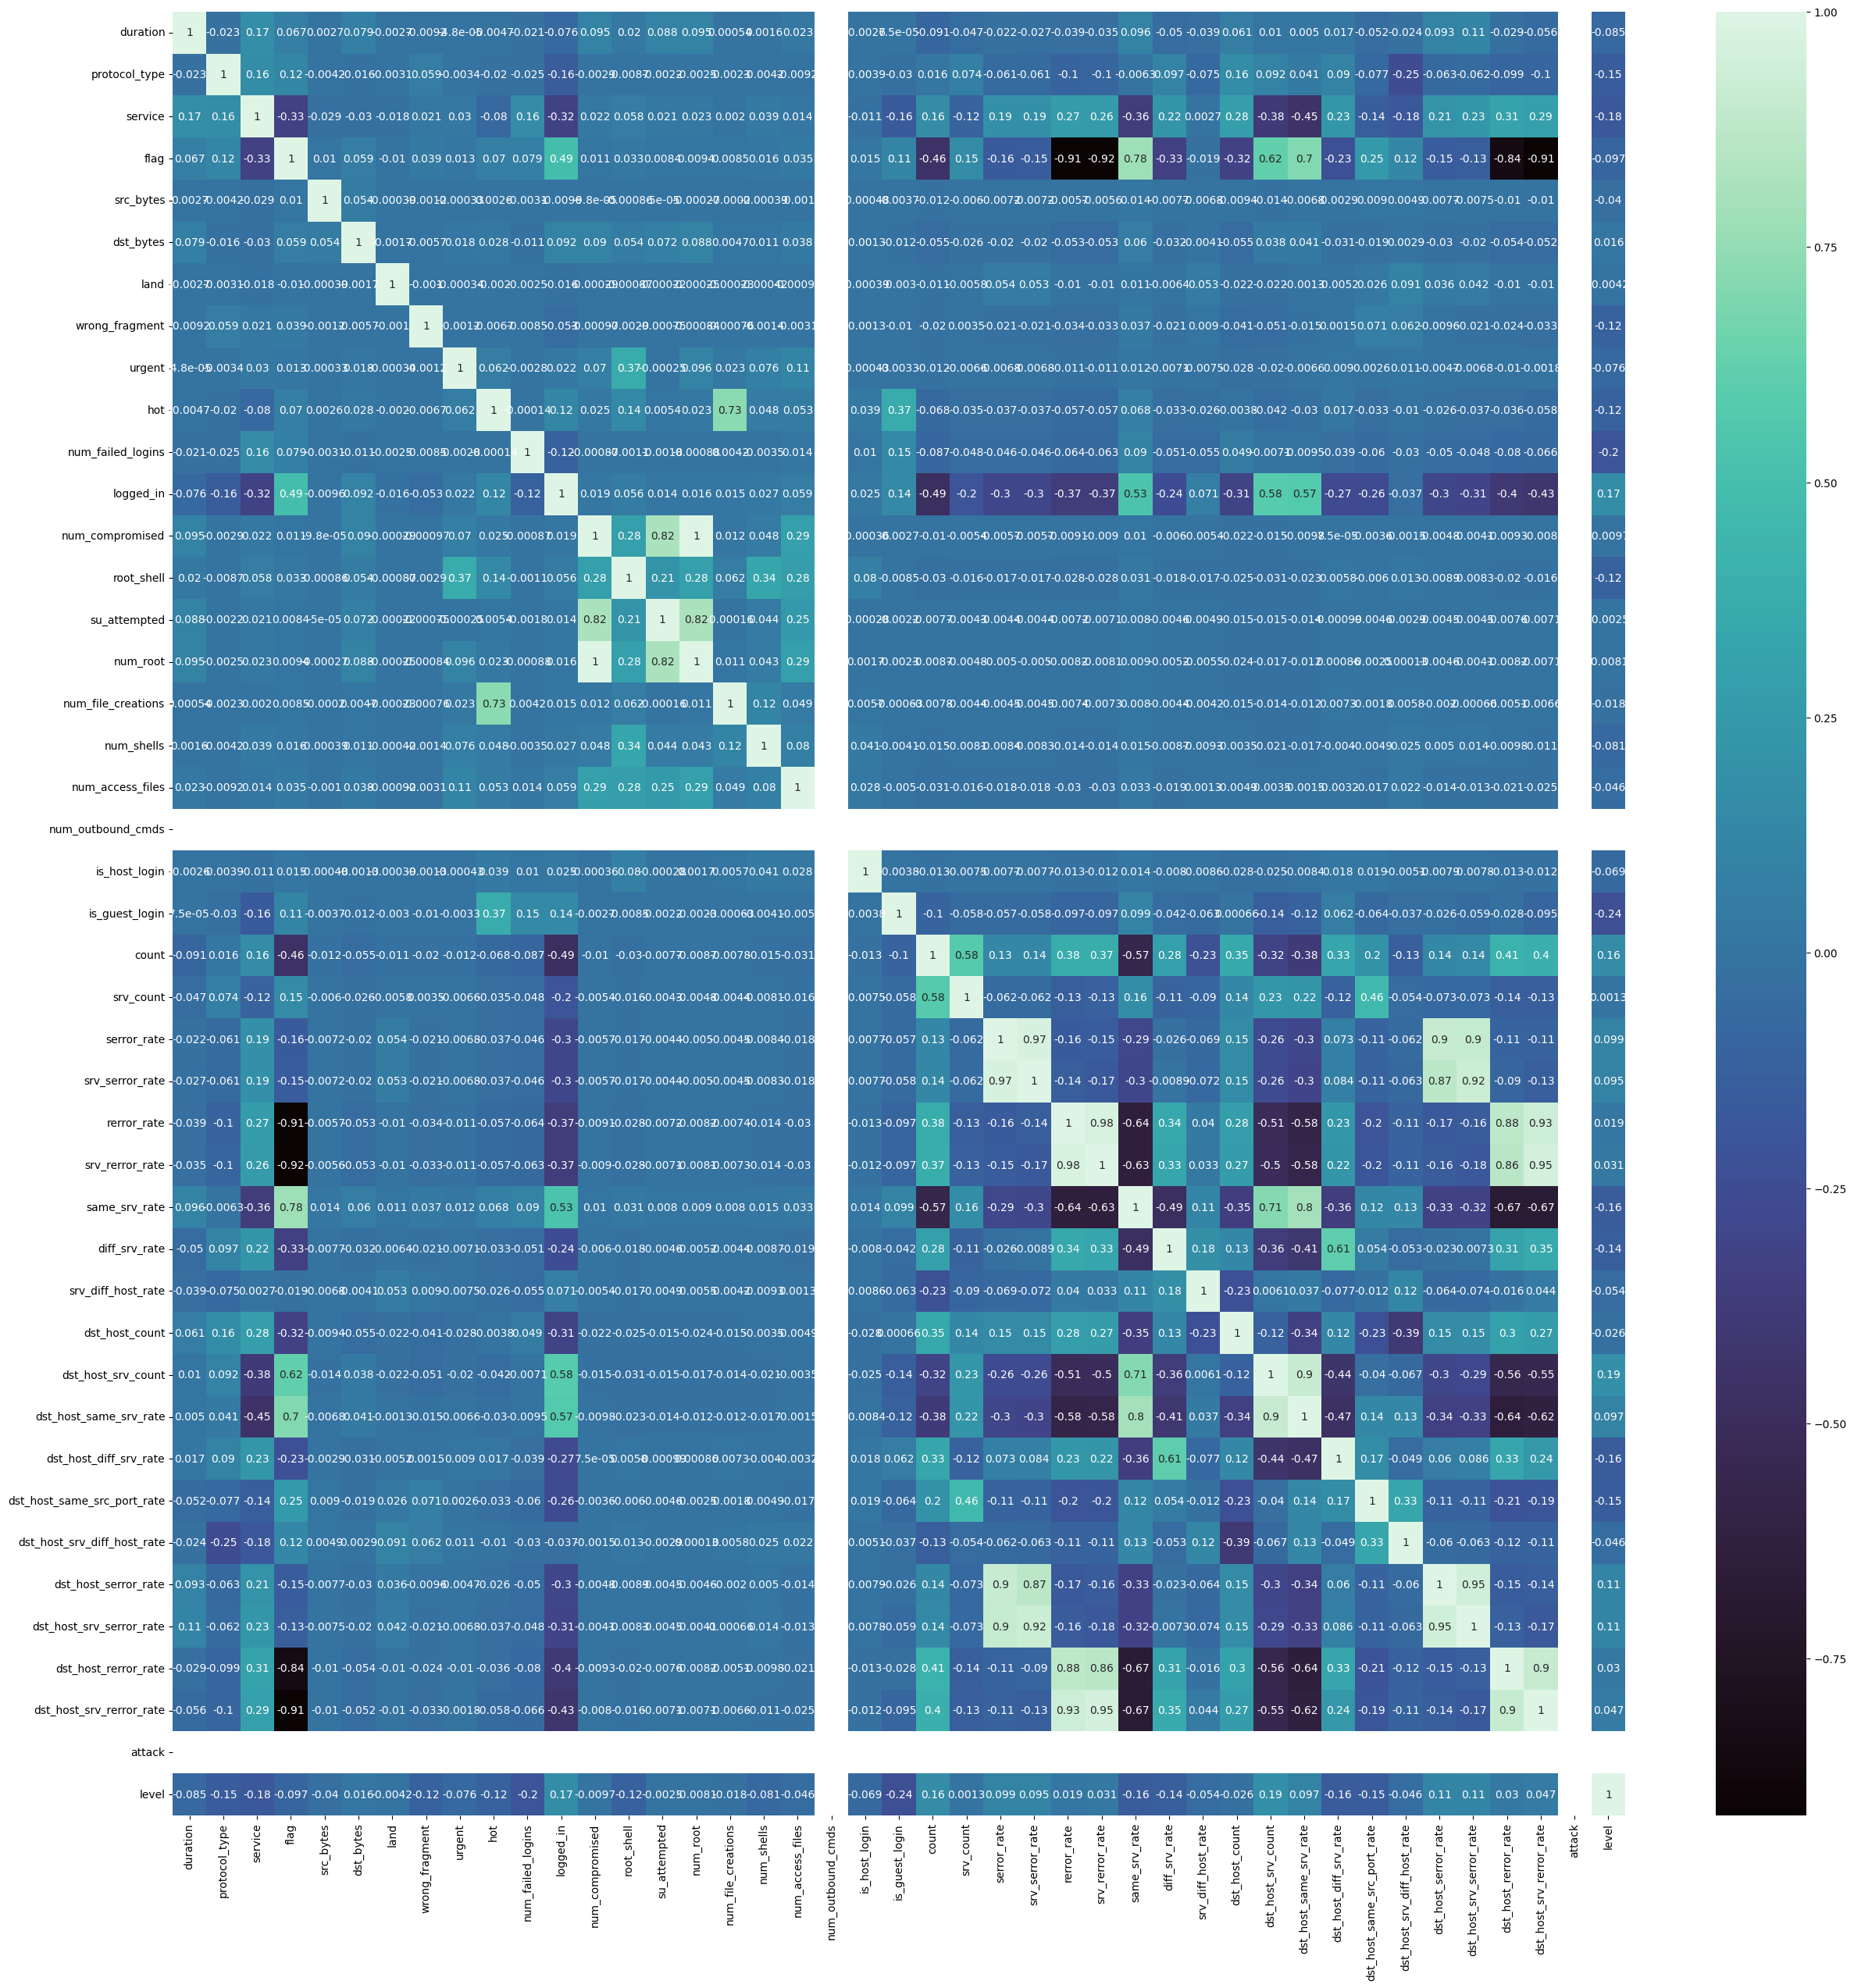

In [51]:
plt.figure(figsize=(30,30))
sns.heatmap(cell_df.corr(), annot= True,cmap='mako')